# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
cityList = cities[0:10]
cityList

['loughrea',
 'cidreira',
 'ribeira grande',
 'cayenne',
 'hermanus',
 'tumannyy',
 'ozernovskiy',
 'leningradskiy',
 'mataura',
 'mahajanga']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
temperatures = []
humidities = []
speeds = []
cloudiness = []

#pulling latitudes/longitudes now, so I don't have to run through data again later
latitudes = []
longitudes = []
citiesFound = []

for i in range(len(cities)):
    city = cities[i]

    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
    # print(url)

    response = requests.get(url)
    # print(response.status_code)

    if response.status_code == 200:
        data = response.json()
#         pprint(data)

        try:
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            humidity = data["main"]["humidity"]
            speed = data["wind"]["speed"]
            clouds = data["clouds"]["all"]
            cityName = data["name"]

            latitudes.append(lat)
            longitudes.append(long)
            temperatures.append(temp)
            humidities.append(humidity)
            speeds.append(speed)
            cloudiness.append(clouds)
            citiesFound.append(cityName)
            
        except Exception as e:
            print(f"Exception for city {city}: {e}")

    elif response.status_code == 404:
        print(f"Missing data in OpenWeatherAPI for {city}")
    else:
        print(response.status_code)
        print("The API is broken.")

    if (i % 5 == 0):
        print(f"City Index: {i} of {len(cities)}")
    
    time.sleep(2)

City Index: 0 of 609
Missing data in OpenWeatherAPI for tumannyy
City Index: 5 of 609
City Index: 10 of 609
Missing data in OpenWeatherAPI for tsihombe
Missing data in OpenWeatherAPI for belushya guba
City Index: 15 of 609
Missing data in OpenWeatherAPI for illoqqortoormiut
City Index: 20 of 609
Missing data in OpenWeatherAPI for karaul
Missing data in OpenWeatherAPI for taolanaro
City Index: 25 of 609
City Index: 30 of 609
City Index: 35 of 609
City Index: 40 of 609
City Index: 45 of 609
City Index: 50 of 609
City Index: 55 of 609
City Index: 60 of 609
City Index: 65 of 609
Missing data in OpenWeatherAPI for macaboboni
City Index: 70 of 609
Missing data in OpenWeatherAPI for vaitupu
City Index: 75 of 609
Missing data in OpenWeatherAPI for barentsburg
City Index: 80 of 609
Missing data in OpenWeatherAPI for saleaula
City Index: 85 of 609
City Index: 90 of 609
Missing data in OpenWeatherAPI for tabiauea
City Index: 95 of 609
City Index: 100 of 609
Missing data in OpenWeatherAPI for tubr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDF = pd.DataFrame()
weatherDF["City"] = citiesFound
weatherDF["Latitude"] = latitudes
weatherDF["Longitude"] = longitudes
weatherDF["Temperature (F)"] = temperatures
weatherDF["Humidity (%)"] = humidities
weatherDF["Wind Speed (mph)"] = speeds
weatherDF["Cloudiness (%)"] = cloudiness

weatherDF.head(10)

,City,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Loughrea,53.20,-8.57,54.37,100,6.93,75
1,Cidreira,-30.18,-50.21,68.25,82,14.54,98
2,Ribeira Grande,38.52,-28.70,61.16,65,13.22,46
3,Cayenne,4.93,-52.33,80.60,88,5.82,20
4,Hermanus,-34.42,19.23,48.99,89,10.22,63
5,Ozernovskiy,51.50,156.52,36.61,74,5.28,100
6,Leningradskiy,69.38,178.42,20.14,94,6.49,100
7,Mataura,-46.19,168.86,57.99,67,8.01,96
8,Mahajanga,-15.72,46.32,75.20,88,4.70,20
9,Douglas,41.30,-96.17,67.91,60,18.34,1


In [6]:
weatherDF.to_csv("weather_df",index=False) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#max humidity is showing as 100% so no need to remove any
weatherDF.describe()

,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,20.602644,15.604910,56.267968,74.190647,8.241115,48.411871
std,32.987753,90.485805,22.840115,18.889808,6.096950,39.803316
min,-54.800000,-179.170000,-24.900000,9.000000,0.110000,0.000000
25%,-5.602500,-65.807500,41.000000,63.000000,3.360000,2.750000
50%,26.225000,19.910000,60.800000,79.000000,6.755000,40.000000
75%,48.195000,93.267500,75.115000,89.000000,11.410000,90.000000
max,78.220000,178.420000,98.600000,100.000000,39.150000,100.000000


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

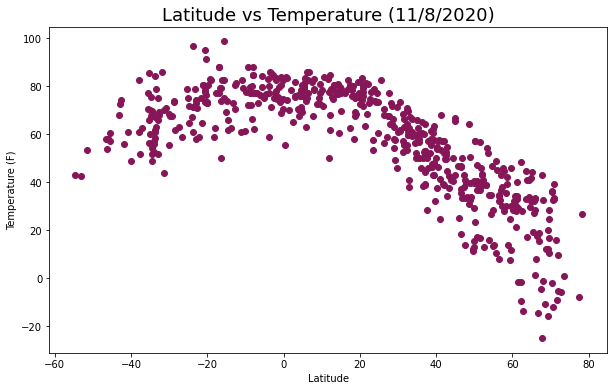

In [42]:
plt.figure(figsize=(10,6))

plt.scatter(weatherDF.Latitude, weatherDF["Temperature (F)"], color="#861657")
plt.title("Latitude vs Temperature (11/8/2020)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Latitude_Temperature.png")
plt.show()

This Scatterplot is analyzing to see if there is a correlation between the Latitude and Temperature.

## Latitude vs. Humidity Plot

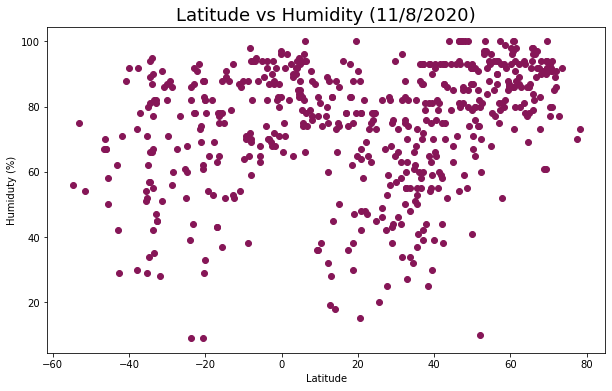

In [41]:
plt.figure(figsize=(10,6))

plt.scatter(weatherDF.Latitude, weatherDF["Humidity (%)"], color="#861657")
plt.title("Latitude vs Humidity (11/8/2020)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Humiduty (%)")

plt.savefig("Latitude_Humidity.png")
plt.show()

This Scatterplot is analyzing to see if there is a correlation between the Latitude and Humidity.

## Latitude vs. Cloudiness Plot

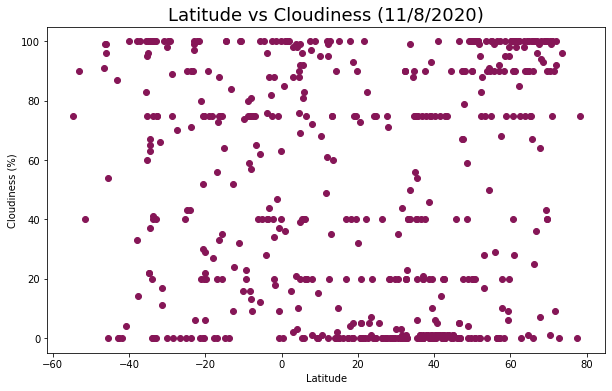

In [40]:
plt.figure(figsize=(10,6))

plt.scatter(weatherDF.Latitude, weatherDF["Cloudiness (%)"], color="#861657")
plt.title("Latitude vs Cloudiness (11/8/2020)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Latitude_Cloudiness.png")

plt.show()

This Scatterplot is analyzing to see if there is a correlation between the Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

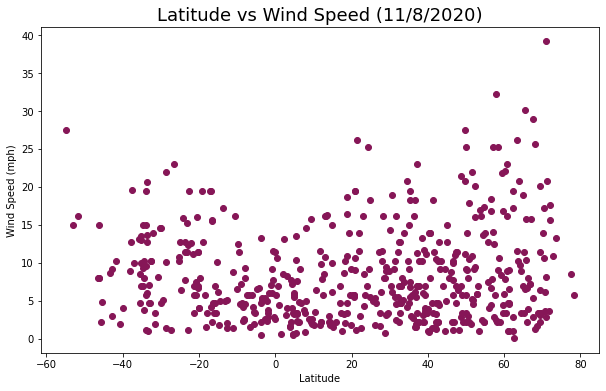

In [39]:
plt.figure(figsize=(10,6))

plt.scatter(weatherDF.Latitude, weatherDF["Wind Speed (mph)"], color="#861657")
plt.title("Latitude vs Wind Speed (11/8/2020)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Latitude_WindSpeed.png")
plt.show()

This Scatterplot is analyzing to see if there is a correlation between the Latitude and Wind Speed.

## Linear Regression

In [14]:
target = weatherDF["Temperature (F)"]
feature = weatherDF.Latitude
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (F)   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     545.3
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.78e-84
Time:                        20:18:43   Log-Likelihood:                -2337.4
No. Observations:                 556   AIC:                             4679.
Df Residuals:                     554   BIC:                             4687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3146      0.812     81.700      0.000      64.720      67.909
Latitude      -0.4876      0.021    -23.351      0.000      -0.529      -0.447
==============================================================================
Omnibus:                       53.568   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.667
Skew:                          -0.832   Prob(JB):                     3.34e-15
Kurtosis:                       3.329   Cond. No.                         45.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
def regressionPlots (hemisphere, weatherDF, inp_target):
    #filter
    if hemisphere in ["Northern"]:
        hemisphereDF = weatherDF.loc[weatherDF["Latitude"] >= 0]
    elif ["Southern"]:
        hemisphereDF = weatherDF.loc[weatherDF["Latitude"] <= 0]
        
    target = hemisphereDF[inp_target]
    feature = hemisphereDF.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    #print(results.summary())
    
    slope = results.params[1]
    intercept = results.params[0]

    regression = feature * slope + intercept

    lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(lineEquation)
    
    plt.figure(figsize=(10,6))

    plt.scatter(hemisphereDF.Latitude, hemisphereDF[inp_target], color="#861657")
    plt.title(f"Latitude vs {inp_target} (11/8/2020)", fontsize=18)
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    
    plt.plot(feature, regression, color="#FFA69E")
    
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.0x + 88.41


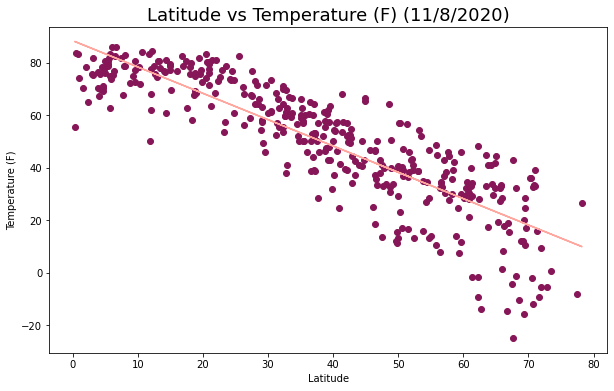

In [45]:
regressionPlots("Northern", weatherDF, "Temperature (F)") 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.46x + 81.04


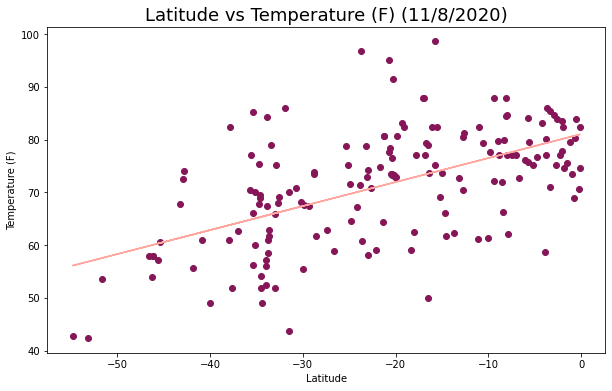

In [46]:
regressionPlots("Southern", weatherDF, "Temperature (F)") 

These Scatterplots are analyzing to see if there is a correlation between the Latitude and Temperature in the different hemispheres. In the northern hempisphere there is a negative correlation, because as the latitude increases, the temperature decreases. This is the opposite of the southern hemisphere that has a positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26x + 65.79


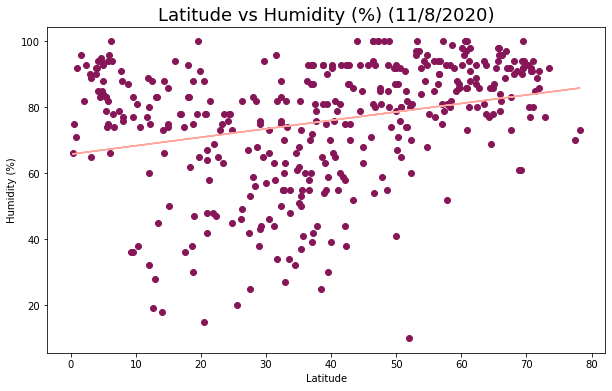

In [53]:
regressionPlots("Northern", weatherDF, "Humidity (%)") 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.44x + 80.03


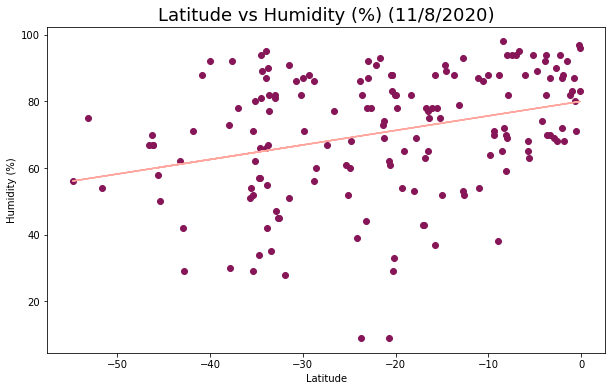

In [48]:
regressionPlots("Southern", weatherDF, "Humidity (%)") 

These Scatterplots are analyzing to see if there is a correlation between the Latitude and Humidity in the different hemispheres. In both hemispheres, there appears to be a sligt positive correlation, as Latitude increases, so does the Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x + 26.51


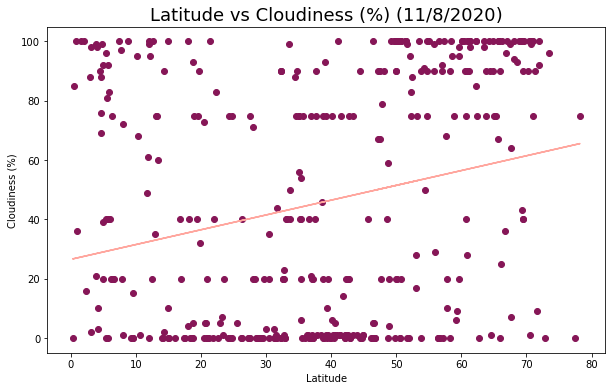

In [49]:
regressionPlots("Northern", weatherDF, "Cloudiness (%)") 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.14x + 51.77


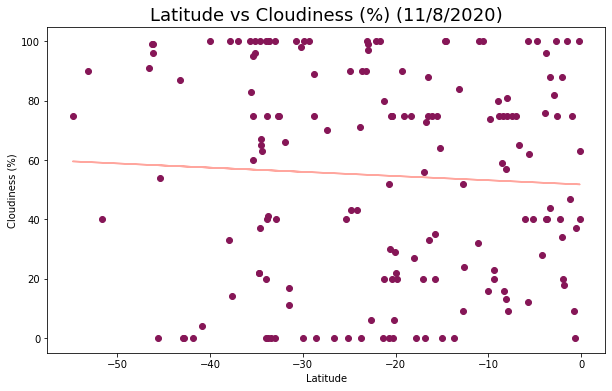

In [50]:
regressionPlots("Southern", weatherDF, "Cloudiness (%)") 

These Scatterplots are analyzing to see if there is a correlation between the Latitude and Cloudiness in the different hemispheres. There does not appear to be any correlation between the two variables, as their are points all over the graph.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.07x + 5.53


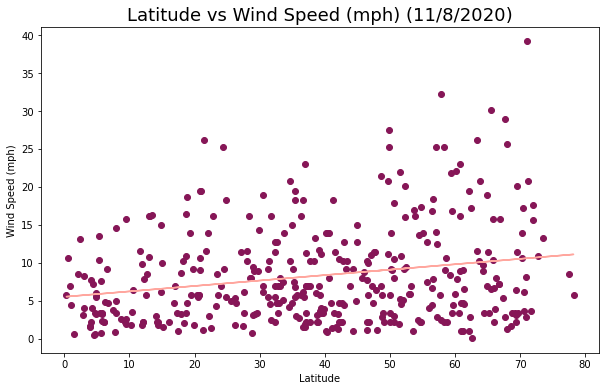

In [51]:
regressionPlots("Northern", weatherDF, "Wind Speed (mph)") 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.13x + 5.33


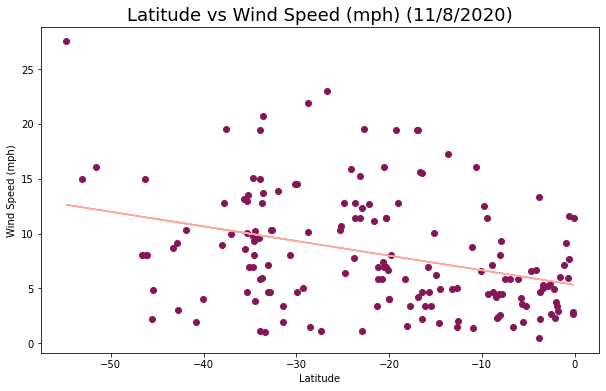

In [52]:
regressionPlots("Southern", weatherDF, "Wind Speed (mph)") 

These Scatterplots are analyzing to see if there is a correlation between the Latitude and Wind Speed in the different hemispheres. It looks as though there is a slight positive correlation in the northern hemisphere, and a slight negative correlation in the southern hemisphere.